<a href="https://colab.research.google.com/github/Priyagane/Potato-plant-disease./blob/main/Potato_plant_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

import matplotlib.pyplot as plt


In [6]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/Data_sets/Potato plant",shuffle=True,image_size=(256,256),batch_size=32)


Found 1413 files belonging to 3 classes.


In [7]:
for image, label in dataset:
  print(label)

tf.Tensor([0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1], shape=(32,), dtype=int32)
tf.Tensor([2 0 0 0 0 0 2 2 0 0 0 0 1 0 0 2 0 0 0 1 0 0 0 2 0 0 0 0 2 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([2 1 0 1 0 0 1 0 0 0 2 2 0 2 1 0 2 1 0 0 2 0 0 1 1 0 1 1 0 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 2 0 1 0 0 0 1 1 2 0 0 0 1 0 0], shape=(32,), dtype=int32)
tf.Tensor([1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 1 0 2 1 0 0 0 0 0 0 2 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1], shape=(32,), dtype=int32)
tf.Tensor([1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 2], shape=(32,), dtype=int32)
tf.Tensor([0 1 1 0 0 1 0 0 0 0 2 0 2 0 0 0 1 0 0 0 0 0 0 2 0 0 1 0 0 0 1 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 2 0 0 0 0 2 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 1 0 2 0 0], shape=(32,), dtype=int32)
tf.Tensor([0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 2 0 1 0 1 0 1 2 0 2 

In [8]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [9]:
len(dataset)

45

In [10]:
83*32


2656

(32, 256, 256, 3) [2 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 2 1 0 1 0 0 1 0 0 0 0 1 2 0 0]


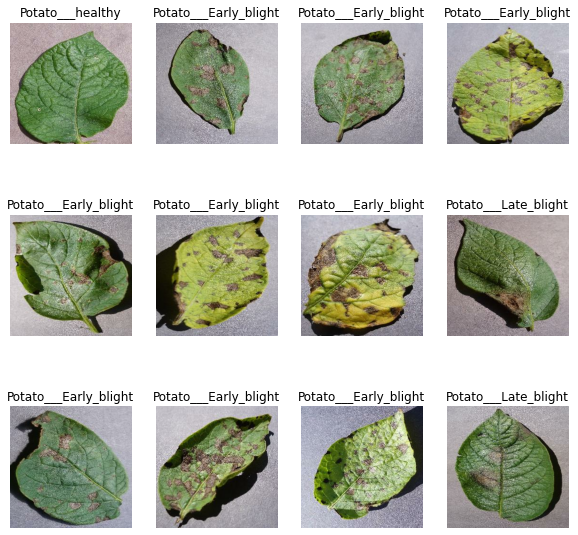

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape, label_batch.numpy())
  plt.figure(figsize=(10,10))
  for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")

In [12]:
def get_dset(ds,train_split=0.8,test_split=0.1,val_split=0.1,shuffle=True, shufflesize=10000):

   ds_size = len(ds)
   if shuffle:
     ds = ds.shuffle(shufflesize, seed=12)

   train_size = int(train_split * ds_size)
   val_size = int(val_split*ds_size)
   test_size = int(test_split*ds_size)
   train_ds = ds.take(train_size)
   val_ds=ds.skip(train_size).take(val_size)
   test_ds = ds.skip(train_size).skip(val_size).take(test_size)

   return train_ds,val_ds,test_ds

In [13]:
train_ds,val_ds, test_ds = get_dset(dataset)

In [14]:
len(train_ds)

36

In [15]:
len(val_ds)

4

In [16]:
len(test_ds)

4

In [17]:
cnn = tf.keras.models.Sequential()

In [18]:
#cnn.add(tf.keras.layers.Resizing(256,256))
cnn.add(tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255))

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 256,256, 3)))

In [20]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [22]:
cnn.add(tf.keras.layers.Flatten())

In [23]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [24]:
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))

In [25]:
cnn.build(input_shape=(32,256,256,3))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (32, 123008)              0

In [26]:
cnn.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])

In [27]:
history = cnn.fit(train_ds ,batch_size=32, validation_data= val_ds, epochs=50)

Epoch 1/50
36/36 [==============================] - 16s 132ms/step - loss: 0.9781 - accuracy: 0.7076 - val_loss: 0.2809 - val_accuracy: 0.8750
Epoch 2/50
36/36 [==============================] - 7s 121ms/step - loss: 0.2547 - accuracy: 0.9022 - val_loss: 0.1846 - val_accuracy: 0.8906
Epoch 3/50
36/36 [==============================] - 7s 120ms/step - loss: 0.1411 - accuracy: 0.9467 - val_loss: 0.0751 - val_accuracy: 0.9922
Epoch 4/50
36/36 [==============================] - 7s 122ms/step - loss: 0.0692 - accuracy: 0.9760 - val_loss: 0.0497 - val_accuracy: 0.9922
Epoch 5/50
36/36 [==============================] - 7s 121ms/step - loss: 0.0430 - accuracy: 0.9902 - val_loss: 0.0384 - val_accuracy: 0.9922
Epoch 6/50
36/36 [==============================] - 7s 121ms/step - loss: 0.0169 - accuracy: 0.9964 - val_loss: 0.0130 - val_accuracy: 0.9922
Epoch 7/50
36/36 [==============================] - 7s 122ms/step - loss: 0.0350 - accuracy: 0.9876 - val_loss: 0.0321 - val_accuracy: 0.9922
Epoch

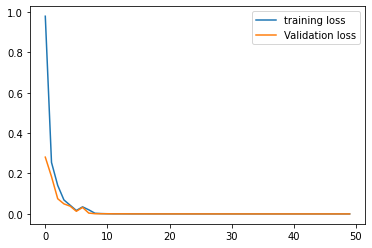

In [28]:
plt.plot(history.history["loss"],label="training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.legend(loc="upper right")
plt.show()

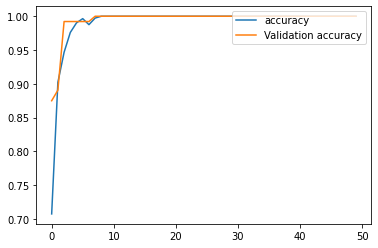

In [29]:
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.legend(loc="upper right")
plt.show()

In [30]:
result = cnn.predict(test_ds)


4/4 [==============================] - 3s 24ms/step


In [31]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

1/1 [==============================] - 0s 30ms/step


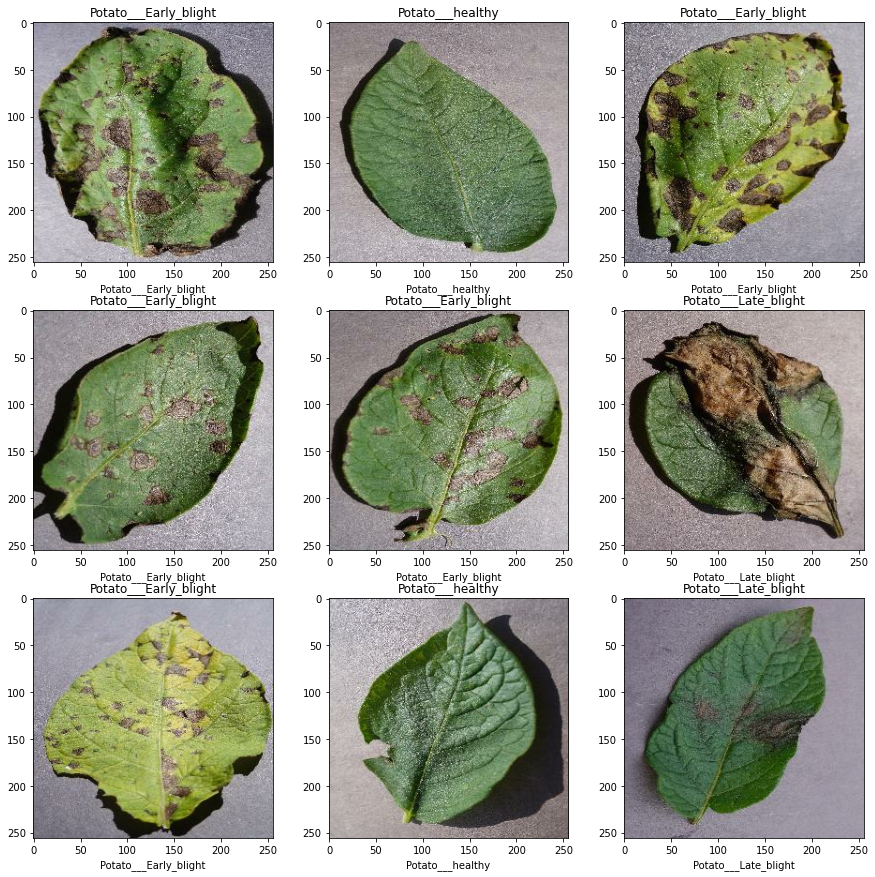

In [34]:
import numpy as np
plt.figure(figsize=(15,15))
for img_batch , lb_batch in test_ds.take(1):
  prediction = cnn.predict(img_batch)
  for i in range(9):
    ax = plt.subplot(3,3, i+1)


    first_image = img_batch[i].numpy().astype("uint8")
    first_label = lb_batch[i].numpy()
  
    
    #print("actual label", class_names[first_label])

    #prediction = cnn.predict(img_batch)
    #print("predicted", class_names[np.argmax(prediction[i])])
    ax.imshow(first_image)
    pred_class=class_names[np.argmax(prediction[i])]

    plt.title(pred_class)
    plt.xlabel(class_names[first_label])

In [35]:
result

array([[3.07555370e-10, 1.08075110e-04, 9.99891877e-01],
       [1.15554988e-09, 1.00000000e+00, 3.73152768e-16],
       [9.99962330e-01, 2.23159623e-05, 1.54135942e-05],
       [1.00000000e+00, 3.64557429e-12, 1.41406984e-26],
       [1.00000000e+00, 2.15579519e-08, 4.17280458e-16],
       [4.32470981e-13, 3.21593932e-11, 1.00000000e+00],
       [9.62712549e-13, 8.40437095e-11, 1.00000000e+00],
       [1.00000000e+00, 8.88073970e-09, 9.44723744e-10],
       [1.00000000e+00, 3.68728384e-14, 1.01329360e-16],
       [1.00000000e+00, 1.08312763e-08, 2.23107065e-32],
       [5.99903157e-14, 1.76951812e-06, 9.99998212e-01],
       [9.99988675e-01, 1.13558308e-05, 1.86017503e-11],
       [9.03055422e-07, 6.28347016e-06, 9.99992847e-01],
       [1.26110922e-06, 9.99998212e-01, 4.89558829e-07],
       [1.00000000e+00, 7.16949780e-18, 2.15345510e-32],
       [1.00000000e+00, 1.08868448e-12, 3.45803863e-19],
       [1.00000000e+00, 1.28401041e-08, 5.36466911e-18],
       [9.99998808e-01, 1.21469

In [36]:
from tensorflow.keras.applications.mobilenet import preprocess_input

In [38]:
img = tf.keras.preprocessing.image.load_img("/content/potato-leaf.png", target_size=(256,256))
img = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img, axis=0)   #(0, h, w, 3)
img_tensor = preprocess_input(img_tensor)

In [39]:
image_pred = cnn.predict(img_tensor)

1/1 [==============================] - 0s 130ms/step


In [40]:
class_names[np.argmax(image_pred)]

'Potato___Early_blight'